In [1]:
import pandas as pd
from datetime import datetime
import math
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ETF data.csv')
pivot_table = pd.pivot_table(df, index = 'caldt', columns = 'crsp_fundno', values = 'dnav')
df3 = df.groupby(['caldt', 'ticker'])['dnav'].sum().unstack()
df3.head()

ticker,ITE,SSO,VNQ,VWO,WIP
caldt,,,,,
20081231,59.2117,26.50,36.50,23.56,47.3077
20090102,58.8422,28.17,35.35,24.50,47.6568
20090105,58.8675,27.92,34.53,25.02,46.9809
20090106,58.8461,28.35,36.49,25.45,46.7291
20090107,58.8968,26.68,35.08,24.33,47.2719


# Metrics and Plots by Asset Class

## SSO

In [17]:
df_SSO = df[df['ticker'] == 'SSO']
df_SSO['caldt'] = pd.to_datetime(df_SSO['caldt'], format = '%Y%m%d')
df_SSO.sort_values('caldt', inplace=True)
df_SSO['year'] = df_SSO['caldt'].dt.to_period('Y').astype(str)
df_SSO['month'] = df_SSO['caldt'].dt.to_period('m').astype(str)
df_SSO['dnav']=np.where(df_SSO['caldt']>="5/19/2015", df_SSO['dnav']*2, df_SSO['dnav'])

df_SSO['forCalculations'] = (df_SSO['dnav'] - df_SSO['dnav'].shift(1))/df_SSO['dnav'].shift(1) + 1
'''After looking at the data, we noticed that there was a strange drop in dnav on May 20, 2015.
We found out that this is becuase the fund split its shares 2:1, so in order to correct this we doubled the dnav of
all shares after this date. In essense, after the date we are measuring the return of a person owning two shares
as opposed to one.'''
df_SSO.head()

,ticker,crsp_fundno,caldt,dnav,dret,year,month,forCalculations
1525,SSO,25653,2008-12-31,26.50,0.028727,2008,2008-12,NaN
1496,SSO,25653,2009-01-02,28.17,0.063019,2009,2009-01,0.063019
1519,SSO,25653,2009-01-05,27.92,-0.008875,2009,2009-01,-0.008875
2441,SSO,25653,2009-01-06,28.35,0.015401,2009,2009-01,0.015401
1495,SSO,25653,2009-01-07,26.68,-0.058907,2009,2009-01,-0.058907


In [4]:
# Fixing the split in shares
df_SSO['dnav']=np.where(df_SSO['caldt']>="5/19/2015", df_SSO['dnav']*2, df_SSO['dnav'])

In [11]:
# Annualized return
df_SSO = df_SSO.fillna(1)
cum_return = df_SSO['forCalculations'].prod()
cum_return**(1/10.0) - 1

0.21480094567801178

In [12]:
# Annualized Standard Deviation
df_SSO['forCalculations'].std()*math.sqrt(252)

0.3329624481790537

In [14]:
# Sharpe Ratio
(cum_return**(1/10.0) - 1) / (df_SSO['forCalculations'].std()*math.sqrt(252))

0.6451206340316809

In [18]:
#Skewness
df_SSO['forCalculations'].skew()

-0.21379889166253846

In [8]:
# Creating a column of cumulative returns
def function(x):
    if x == 100:
        return 100
    else:
        return df_SSO['forCalculations'].iloc[:x+1].prod()*100
    
df_SSO.reset_index(inplace=True)
df_SSO['forCalculations'] = df_SSO['forCalculations'].fillna(1)
df_SSO['cumulative returns'] = df_SSO.index.values
df_SSO['cumulative returns'].iloc[0] = 100

df_SSO['cumulative returns'] = df_SSO['cumulative returns'].apply(function)

Text(0.5, 1.0, 'SSO')

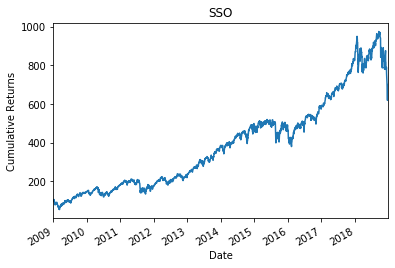

In [50]:
# Plotting cumulative returns
df_SSO = df_SSO.set_index('caldt')
df_SSO['cumulative returns'].plot()
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.title('SSO')

## VWO

In [25]:
df_VWO = df[df['ticker'] == 'VWO']
df_VWO['caldt'] = pd.to_datetime(df_VWO['caldt'], format = '%Y%m%d')
df_VWO.sort_values('caldt', inplace=True)
df_VWO['year'] = df_VWO['caldt'].dt.to_period('Y').astype(str)
df_VWO['month'] = df_VWO['caldt'].dt.to_period('m').astype(str)
df_VWO['forCalculations'] = (df_VWO['dnav'] - df_VWO['dnav'].shift(1))/df_VWO['dnav'].shift(1) + 1

In [27]:
# Annualized return
df_VWO = df_VWO.fillna(1)
cum_return1 = df_VWO['forCalculations'].prod()
cum_return1**(1/10.0) - 1

0.04946041956005742

In [28]:
# Annualized Standard Deviation
df_VWO['forCalculations'].std()*math.sqrt(252)

0.19547540957135234

In [29]:
# Sharpe Ratio
(cum_return1**(1/10.0) - 1) / (df_VWO['forCalculations'].std()*math.sqrt(252))

0.2530262996686721

In [30]:
#Skewness
df_VWO['forCalculations'].skew()

-0.06608619656977978

In [31]:
# Creating a column for cumulative returns
def function1(x):
    if x == 100:
        return 100
    else:
        return df_VWO['forCalculations'].iloc[:x+1].prod()*100
    
df_VWO.reset_index(inplace=True)
df_VWO['forCalculations'] = df_VWO['forCalculations'].fillna(1)
df_VWO['cumulative returns'] = df_VWO.index.values
df_VWO['cumulative returns'].iloc[0] = 100

df_VWO['cumulative returns'] = df_VWO['cumulative returns'].apply(function1)

Text(0.5,1,'VWO')

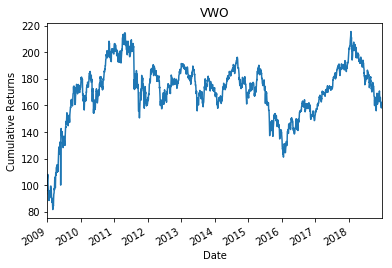

In [32]:
# Plotting cumulative returns
df_VWO = df_VWO.set_index('caldt')
df_VWO['cumulative returns'].plot()
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.title('VWO')

## ITE

In [33]:
df_ITE = df[df['ticker'] == 'ITE']
df_ITE['caldt'] = pd.to_datetime(df_ITE['caldt'], format = '%Y%m%d')
df_ITE.sort_values('caldt', inplace=True)
df_ITE['year'] = df_ITE['caldt'].dt.to_period('Y').astype(str)
df_ITE['month'] = df_ITE['caldt'].dt.to_period('m').astype(str)
df_ITE['forCalculations'] = (df_ITE['dnav'] - df_ITE['dnav'].shift(1))/df_ITE['dnav'].shift(1) + 1

In [34]:
# Annualized return
df_ITE = df_ITE.fillna(1)
cum_return2 = df_ITE['forCalculations'].prod()
cum_return2**(1/10.0) - 1

0.00028319764690798443

In [35]:
# Annualized Standard Deviation
df_ITE['forCalculations'].std()*math.sqrt(252)

0.028396192972341302

In [36]:
# Sharpe ratio
(cum_return2**(1/10.0) - 1) / (df_ITE['forCalculations'].std()*math.sqrt(252))

0.00997308502529994

In [37]:
#Skewness
df_ITE['forCalculations'].skew()

0.13497472174943057

In [27]:
# Creating a column for cumulative returns
def function2(x):
    if x == 100:
        return 100
    else:
        return df_ITE['forCalculations'].iloc[:x+1].prod()*100
df_ITE.reset_index(inplace=True)
df_ITE['forCalculations'] = df_ITE['forCalculations'].fillna(1)
df_ITE['cumulative returns'] = df_ITE.index.values
df_ITE['cumulative returns'].iloc[0] = 100

df_ITE['cumulative returns'] = df_ITE['cumulative returns'].apply(function2)

Text(0.5, 1.0, 'ITE')

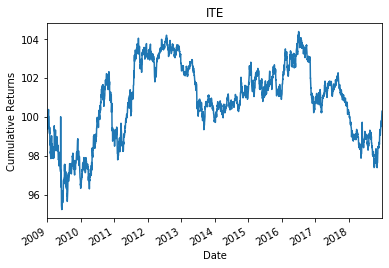

In [28]:
# Plotting cumulative returns
df_ITE = df_ITE.set_index('caldt')
df_ITE['cumulative returns'].plot()
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.title('ITE')

## WIP

In [38]:
df_WIP = df[df['ticker'] == 'WIP']
df_WIP['caldt'] = pd.to_datetime(df_WIP['caldt'], format = '%Y%m%d')
df_WIP.sort_values('caldt', inplace=True)
df_WIP['year'] = df_WIP['caldt'].dt.to_period('Y').astype(str)
df_WIP['month'] = df_WIP['caldt'].dt.to_period('m').astype(str)
df_WIP['forCalculations'] = (df_WIP['dnav'] - df_WIP['dnav'].shift(1))/df_WIP['dnav'].shift(1) + 1

In [40]:
# Annualized return
df_WIP = df_WIP.fillna(1)
cum_return3 = df_WIP['forCalculations'].prod()
cum_return3**(1/10.0) - 1

0.009739100075747853

In [41]:
# Annualized Standard Deviation
df_WIP['forCalculations'].std()*math.sqrt(252)

0.08770004164871807

In [42]:
# Sharpe Ratio
(cum_return3**(1/10.0) - 1) / (df_WIP['forCalculations'].std()*math.sqrt(252))

0.11105011916365733

In [44]:
#Skewness
df_WIP['forCalculations'].skew()

0.1117062386504679

In [33]:
# Creating a column for cumulative returns
def function3(x):
    if x == 100:
        return 100
    else:
        return df_WIP['forCalculations'].iloc[:x+1].prod()*100
    
df_WIP.reset_index(inplace=True)
df_WIP['forCalculations'] = df_WIP['forCalculations'].fillna(1)
df_WIP['cumulative returns'] = df_WIP.index.values
df_WIP['cumulative returns'].iloc[0] = 100

df_WIP['cumulative returns'] = df_WIP['cumulative returns'].apply(function3)

Text(0.5, 1.0, 'WIP')

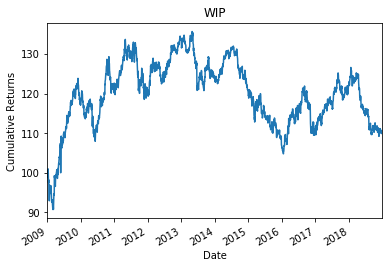

In [34]:
# Plotting cumulative returns
df_WIP = df_WIP.set_index('caldt')
df_WIP['cumulative returns'].plot()
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.title('WIP')

## VNQ

In [51]:
df_VNQ = df[df['ticker'] == 'VNQ']
df_VNQ['caldt'] = pd.to_datetime(df_VNQ['caldt'], format = '%Y%m%d')
df_VNQ.sort_values('caldt', inplace=True)
df_VNQ['year'] = df_VNQ['caldt'].dt.to_period('Y').astype(str)
df_VNQ['month'] = df_VNQ['caldt'].dt.to_period('m').astype(str)
df_VNQ['forCalculations'] = (df_VNQ['dnav'] - df_VNQ['dnav'].shift(1))/df_VNQ['dnav'].shift(1) + 1

In [47]:
df_VNQ = df_VNQ.fillna(1)
cum_return4 = df_VNQ['forCalculations'].prod()
cum_return4**(1/10.0) - 1

0.07408530352965759

In [48]:
# Annualized Standard Deviation
df_VNQ['forCalculations'].std()*math.sqrt(252)

0.2781472499545762

In [49]:
# Sharpe Ratio
(cum_return4**(1/10.0) - 1) / (df_VNQ['forCalculations'].std()*math.sqrt(252))

0.2663528168686059

In [52]:
#Skewness
df_VNQ['forCalculations'].skew()

0.6146760798014225

In [39]:
# Creating a column for cumulative returns
def function4(x):
    if x == 100:
        return 100
    else:
        return df_VNQ['forCalculations'].iloc[:x+1].prod()*100

df_VNQ.reset_index(inplace=True)
df_VNQ['forCalculations'] = df_VNQ['forCalculations'].fillna(1)
df_VNQ['cumulative returns'] = df_VNQ.index.values
df_VNQ['cumulative returns'].iloc[0] = 100

df_VNQ['cumulative returns'] = df_VNQ['cumulative returns'].apply(function4)


Text(0.5, 1.0, 'VNQ')

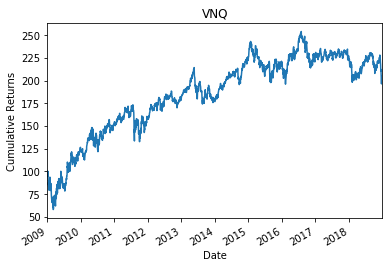

In [40]:
# Plotting cumulative returns
df_VNQ = df_VNQ.set_index('caldt')
df_VNQ['cumulative returns'].plot()
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.title('VNQ')

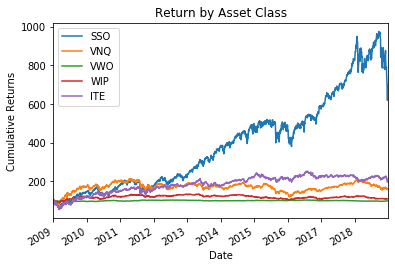

In [69]:
df_SSO['cumulative returns'].plot()
df_VWO['cumulative returns'].plot()
df_ITE['cumulative returns'].plot()
df_WIP['cumulative returns'].plot()
df_VNQ['cumulative returns'].plot()
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.title('Return by Asset Class')
plt.legend(['SSO','VNQ','VWO','WIP','ITE'])

# Maximum Drawdown

In [39]:
pivot_table=pd.pivot_table(df, index='caldt', columns='crsp_fundno', values='dret')
pivot_table.head()
def max_drawdown(pivot_table, x):
   window=2517
   pivot_table['cum_ret']= (pivot_table[x]+1).cumprod()
   window_max=pivot_table['cum_ret'].rolling(window, min_periods=1).max()
   drawdown=pivot_table['cum_ret']/window_max - 1.0
   return drawdown.min()
for i in pivot_table.columns:
   print(i,':',max_drawdown(pivot_table, i))

25653 : -0.4860677130458163
31350 : -0.356347540119651
31446 : -0.4216425811712059
37383 : -0.18733353680107456
43610 : -0.042104253929323376


# Rebalancing

In [119]:
df_SSO_group = df_SSO.groupby(['month'])[['forCalculations']].prod()
df_VNQ_group = df_VNQ.groupby(['month'])[['forCalculations']].prod()
df_VWO_group = df_VWO.groupby(['month'])[['forCalculations']].prod()
df_ITE_group = df_ITE.groupby(['month'])[['forCalculations']].prod()
df_WIP_group = df_WIP.groupby(['month'])[['forCalculations']].prod()

In [120]:
df['caldt'] = pd.to_datetime(df['caldt'], format = '%Y%m%d')
df['year'] = df['caldt'].dt.to_period('Y').astype(str)
df['month'] = df['caldt'].dt.to_period('m').astype(str)

,index,ticker,crsp_fundno,dnav,dret,year,month,forCalculations,cumulative returns
caldt,,,,,,,,,
2008-12-31,1525,SSO,25653,26.50,0.028727,2008,2008-12,1.000000,100.000000
2009-01-02,1496,SSO,25653,28.17,0.063019,2009,2009-01,1.063019,106.301887
2009-01-05,1519,SSO,25653,27.92,-0.008875,2009,2009-01,0.991125,105.358491
2009-01-06,2441,SSO,25653,28.35,0.015401,2009,2009-01,1.015401,106.981132
2009-01-07,1495,SSO,25653,26.68,-0.058907,2009,2009-01,0.941093,100.679245


In [147]:
df_SSO_group.reset_index(inplace=True)
df_SSO_group['new'] = df_SSO_group.index.copy()
df_SSO_group['new'].iloc[0] = .3

df_VNQ_group.reset_index(inplace=True)
df_VNQ_group['new'] = df_VNQ_group.index.copy()
df_VNQ_group['new'].iloc[0] = .1

df_VWO_group.reset_index(inplace=True)
df_VWO_group['new'] = df_VWO_group.index.copy()
df_VWO_group['new'].iloc[0] = .25

df_ITE_group.reset_index(inplace=True)
df_ITE_group['new'] = df_ITE_group.index.copy()
df_ITE_group['new'].iloc[0] = .2

df_WIP_group.reset_index(inplace=True)
df_WIP_group['new'] = df_WIP_group.index.copy()
df_WIP_group['new'].iloc[0] = .15

In [148]:
# Creating a function which rebalances the portfolio
def function5(x):
    if x in [.3, .1, .25, .2, .15]:
        return .3
    else:
        x = int(x)
        y = df_SSO_group['new'].loc[x-1] + df_VNQ_group['new'].loc[x-1] + df_VWO_group['new'].loc[x-1] + df_ITE_group['new'].loc[x-1] + df_WIP_group['new'].loc[x-1]
        newSSO = y*.3
        newVNQ = y*.1
        newVWO = y*.25
        newITE = y*.2
        newWIP = y*.15
        df_SSO_group['new'].iloc[x] = newSSO*df_SSO_group['forCalculations'].iloc[x]
        df_VNQ_group['new'].iloc[x] = newVNQ*df_VNQ_group['forCalculations'].iloc[x]
        df_VWO_group['new'].iloc[x] = newVWO*df_VWO_group['forCalculations'].iloc[x]
        df_ITE_group['new'].iloc[x] = newITE*df_ITE_group['forCalculations'].iloc[x]
        df_WIP_group['new'].iloc[x] = newWIP*df_WIP_group['forCalculations'].iloc[x]
        
        return newSSO*df_SSO_group['forCalculations'].iloc[x]
    
df_SSO_group['new'] = df_SSO_group['new'].apply(function5)

,index,month,forCalculations,new2,new
0,0,2008-12,1.000000,0.450000,0.300000
1,1,2009-01,0.826792,0.372057,0.248038
2,2,2009-02,0.788681,0.308291,0.212972
3,3,2009-03,1.151042,0.379902,0.277961
4,4,2009-04,1.190548,0.423140,0.316115


# Finding daily value of the weighted portfolio (Assuming $1 investment)

## Finding daily value by asset class

In [149]:
df_SSO = df_SSO.reset_index()

In [150]:
# Creating a daily value column
mergedSSO = df_SSO.merge(df_SSO_group, left_on = 'month', right_on = 'month')
mergedSSO['daily value'] = mergedSSO['new'].copy()
for i in range(1,len(mergedSSO)):
    if mergedSSO['month'].iloc[i] == mergedSSO['month'].iloc[i-1]:
        mergedSSO['daily value'].iloc[i] = mergedSSO['daily value'].iloc[i-1]*mergedSSO['forCalculations_x'].iloc[i]
    else:
        mergedSSO['daily value'].iloc[i] = mergedSSO['forCalculations_x'].iloc[i]*mergedSSO['new'].iloc[i]

In [46]:
# Creating a daily value column
mergedVNQ = df_VNQ.merge(df_VNQ_group, left_on = 'month', right_on = 'month')
mergedVNQ['daily value'] = mergedVNQ['new'].copy()
for i in range(1,len(mergedSSO)):
    if mergedVNQ['month'].iloc[i] == mergedVNQ['month'].iloc[i-1]:
        mergedVNQ['daily value'].iloc[i] = mergedVNQ['daily value'].iloc[i-1]*mergedVNQ['forCalculations_x'].iloc[i]
    else:
        mergedVNQ['daily value'].iloc[i] = mergedVNQ['forCalculations_x'].iloc[i]*mergedVNQ['new'].iloc[i]

In [47]:
# Creating a daily value column
mergedITE = df_ITE.merge(df_ITE_group, left_on = 'month', right_on = 'month')
mergedITE['daily value'] = mergedITE['new'].copy()
for i in range(1,len(mergedSSO)):
    if mergedITE['month'].iloc[i] == mergedITE['month'].iloc[i-1]:
        mergedITE['daily value'].iloc[i] = mergedITE['daily value'].iloc[i-1]*mergedITE['forCalculations_x'].iloc[i]
    else:
        mergedITE['daily value'].iloc[i] = mergedITE['forCalculations_x'].iloc[i]*mergedITE['new'].iloc[i]

In [48]:
# Creating a daily value column
mergedVWO = df_VWO.merge(df_VWO_group, left_on = 'month', right_on = 'month')
mergedVWO['daily value'] = mergedVWO['new'].copy()
for i in range(1,len(mergedSSO)):
    if mergedVWO['month'].iloc[i] == mergedVWO['month'].iloc[i-1]:
        mergedVWO['daily value'].iloc[i] = mergedVWO['daily value'].iloc[i-1]*mergedVWO['forCalculations_x'].iloc[i]
    else:
        mergedVWO['daily value'].iloc[i] = mergedVWO['forCalculations_x'].iloc[i]*mergedVWO['new'].iloc[i]

In [49]:
# Creating a daily value column
mergedWIP = df_WIP.merge(df_WIP_group, left_on = 'month', right_on = 'month')
mergedWIP['daily value'] = mergedWIP['new'].copy()
for i in range(1,len(mergedSSO)):
    if mergedWIP['month'].iloc[i] == mergedWIP['month'].iloc[i-1]:
        mergedWIP['daily value'].iloc[i] = mergedWIP['daily value'].iloc[i-1]*mergedWIP['forCalculations_x'].iloc[i]
    else:
        mergedWIP['daily value'].iloc[i] = mergedWIP['forCalculations_x'].iloc[i]*mergedWIP['new'].iloc[i]

## Summing the values into a total porfolio value and graphing

In [50]:
def newFunctionYay(x):
    return(mergedVNQ['daily value'].iloc[x] + mergedSSO['daily value'].iloc[x] + mergedITE['daily value'].iloc[x] + mergedWIP['daily value'].iloc[x] + mergedVWO['daily value'].iloc[x])

mergedSSO['portfolio value'] = mergedSSO.index.values
mergedSSO['portfolio value'] = mergedSSO['portfolio value'].map(newFunctionYay)

In [51]:
df_portfolio = mergedSSO[['caldt','portfolio value']]
df_portfolio['caldt'] = pd.to_datetime(df_portfolio['caldt'], format = '%Y%m%d')

,caldt,portfolio value
0,2008-12-31,1.000000
1,2009-01-02,0.922135
2,2009-01-05,0.921052
3,2009-01-06,0.932871
4,2009-01-07,0.904941


Text(0.5, 1.0, 'Weighted Portoflio')

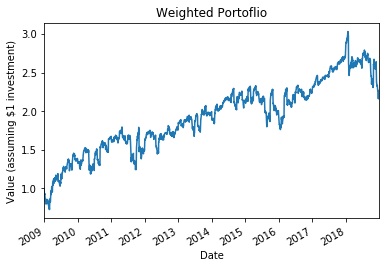

In [177]:
import matplotlib.pyplot as plt
df_portfolio.plot(x = 'caldt', y = 'portfolio value',legend = None)
plt.ylabel("Value (assuming $1 investment)")
plt.xlabel("Date")
plt.title('Weighted Portoflio')

# Performance and Risk Metrics

In [53]:
# Annualized returns
df_portfolio['forCalculations'] = (df_portfolio['portfolio value'] - df_portfolio['portfolio value'].shift(1))/df_portfolio['portfolio value'].shift(1) + 1
cum_returnPort = df_portfolio['forCalculations'].prod()
cum_returnPort**(1/10) - 1

0.08420775064004404

In [54]:
# Annualized Standard Deviation
df_portfolio['dret'] = df_portfolio['portfolio value'] - df_portfolio['portfolio value'].shift(1)
df_portfolio['forCalculations'].std()*math.sqrt(252)

0.2586329345791619

In [55]:
# Sharpe Ratio
(cum_returnPort**(1/10) - 1) / (df_portfolio['forCalculations'].std()*math.sqrt(252))

0.3255878868523215

In [56]:
# Maximum Drawdown
pivot_table=pd.pivot_table(df, index='caldt', values='dret')
pivot_table.head()
def max_drawdown(pivot_table, x):
   window=2517
   pivot_table['cum_ret']= (pivot_table[x]+1).cumprod()
   window_max=pivot_table['cum_ret'].rolling(window, min_periods=1).max()
   drawdown=pivot_table['cum_ret']/window_max - 1.0
   return drawdown.min()
for i in pivot_table.columns:
   print(i,':',max_drawdown(pivot_table, i))

dret : -0.2544005898544166


# Optimization

### The following code is the same as the code earlier, adapted for the new weights

In [165]:
# Finding the optimal portfolio under the restrictions given
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

mu = expected_returns.mean_historical_return(df3)
S = risk_models.sample_cov(df3)
ef = EfficientFrontier(mu, S, weight_bounds = (0, .45))
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

{'ITE': 0.26559, 'SSO': 0.45, 'VNQ': 0.28441, 'VWO': 0.0, 'WIP': 0.0}
Expected annual return: 12.2%
Annual volatility: 22.5%
Sharpe Ratio: 0.45


(0.12174322855438818, 0.22480184455135818, 0.45259071942865636)

In [153]:
df_SSO_group.reset_index(inplace=True)
df_SSO_group['new2'] = df_SSO_group.index.copy()
df_SSO_group['new2'].iloc[0] = .45

df_VNQ_group.reset_index(inplace=True)
df_VNQ_group['new2'] = df_VNQ_group.index.copy()
df_VNQ_group['new2'].iloc[0] = .28441

df_VWO_group.reset_index(inplace=True)
df_VWO_group['new2'] = df_VWO_group.index.copy()
df_VWO_group['new2'].iloc[0] = 0

df_ITE_group.reset_index(inplace=True)
df_ITE_group['new2'] = df_ITE_group.index.copy()
df_ITE_group['new2'].iloc[0] = .26559

df_WIP_group.reset_index(inplace=True)
df_WIP_group['new2'] = df_WIP_group.index.copy()
df_WIP_group['new2'].iloc[0] = 0

In [154]:
def function6(x):
    if x in [.45, .26559, .28441]:
        return .45
    else:
        x = int(x)
        y = df_SSO_group['new2'].loc[x-1] + df_VNQ_group['new2'].loc[x-1] + df_VWO_group['new2'].loc[x-1] + df_ITE_group['new2'].loc[x-1] + df_WIP_group['new2'].loc[x-1]
        newSSO = y*.45
        newVNQ = y*.28441
        newVWO = y*0
        newITE = y*.26559
        newWIP = y*0
        df_SSO_group['new2'].iloc[x] = newSSO*df_SSO_group['forCalculations'].iloc[x]
        df_VNQ_group['new2'].iloc[x] = newVNQ*df_VNQ_group['forCalculations'].iloc[x]
        df_VWO_group['new2'].iloc[x] = newVWO*df_VWO_group['forCalculations'].iloc[x]
        df_ITE_group['new2'].iloc[x] = newITE*df_ITE_group['forCalculations'].iloc[x]
        df_WIP_group['new2'].iloc[x] = newWIP*df_WIP_group['forCalculations'].iloc[x]
        
        return newSSO*df_SSO_group['forCalculations'].iloc[x]
    
df_SSO_group['new2'] = df_SSO_group['new2'].apply(function6)
df_SSO_group.head()

,level_0,index,month,forCalculations,new2,new
0,0,0,2008-12,1.000000,0.450000,0.300000
1,1,1,2009-01,0.826792,0.372057,0.248038
2,2,2,2009-02,0.788681,0.308291,0.212972
3,3,3,2009-03,1.151042,0.379902,0.277961
4,4,4,2009-04,1.190548,0.423140,0.316115


In [157]:
mergedSSO2 = df_SSO.merge(df_SSO_group, left_on = 'month', right_on = 'month')
mergedSSO2['daily value2'] = mergedSSO2['new2'].copy()
for i in range(1,len(mergedSSO2)):
    if mergedSSO2['month'].iloc[i] == mergedSSO2['month'].iloc[i-1]:
        mergedSSO2['daily value2'].iloc[i] = mergedSSO2['daily value2'].iloc[i-1]*mergedSSO2['forCalculations_x'].iloc[i]
    else:
        mergedSSO2['daily value2'].iloc[i] = mergedSSO2['forCalculations_x'].iloc[i]*mergedSSO2['new2'].iloc[i]

In [128]:
mergedITE2 = df_ITE.merge(df_ITE_group, left_on = 'month', right_on = 'month')
mergedITE2['daily value2'] = mergedITE2['new2'].copy()
for i in range(1,len(mergedSSO2)):
    if mergedITE2['month'].iloc[i] == mergedITE2['month'].iloc[i-1]:
        mergedITE2['daily value2'].iloc[i] = mergedITE2['daily value2'].iloc[i-1]*mergedITE2['forCalculations_x'].iloc[i]
    else:
        mergedITE2['daily value2'].iloc[i] = mergedITE2['forCalculations_x'].iloc[i]*mergedITE2['new2'].iloc[i]

In [129]:
mergedVNQ2 = df_VNQ.merge(df_VNQ_group, left_on = 'month', right_on = 'month')
mergedVNQ2['daily value2'] = mergedVNQ2['new2'].copy()
for i in range(1,len(mergedSSO2)):
    if mergedVNQ2['month'].iloc[i] == mergedVNQ['month'].iloc[i-1]:
        mergedVNQ2['daily value2'].iloc[i] = mergedVNQ2['daily value2'].iloc[i-1]*mergedVNQ2['forCalculations_x'].iloc[i]
    else:
        mergedVNQ2['daily value2'].iloc[i] = mergedVNQ2['forCalculations_x'].iloc[i]*mergedVNQ2['new2'].iloc[i]

In [160]:
def newFunctionYay2(x):
    return(mergedVNQ2['daily value2'].iloc[x] + mergedSSO2['daily value2'].iloc[x] + mergedITE2['daily value2'].iloc[x])

mergedSSO2['portfolio value2'] = mergedSSO2.index.values
mergedSSO2['portfolio value2'] = mergedSSO2['portfolio value2'].map(newFunctionYay2)

In [161]:
df_portfolio2 = mergedSSO2[['caldt','portfolio value2']]
df_portfolio2['caldt'] = pd.to_datetime(df_portfolio2['caldt'], format = '%Y%m%d')
mergedSSO2.head()

,level_0_x,caldt,index_x,ticker,crsp_fundno,dnav,dret,year,month,forCalculations_x,cumulative returns,level_0_y,index_y,forCalculations_y,new2,new,daily value2,portfolio value2
0,0,2008-12-31,1525,SSO,25653,26.50,0.028727,2008,2008-12,1.000000,100.000000,0,0,1.000000,0.450000,0.300000,0.450000,1.000000
1,1,2009-01-02,1496,SSO,25653,28.17,0.063019,2009,2009-01,1.063019,106.301887,1,1,0.826792,0.372057,0.248038,0.395503,0.883069
2,2,2009-01-05,1519,SSO,25653,27.92,-0.008875,2009,2009-01,0.991125,105.358491,1,1,0.826792,0.372057,0.248038,0.391993,0.874395
3,3,2009-01-06,2441,SSO,25653,28.35,0.015401,2009,2009-01,1.015401,106.981132,1,1,0.826792,0.372057,0.248038,0.398030,0.892948
4,4,2009-01-07,1495,SSO,25653,26.68,-0.058907,2009,2009-01,0.941093,100.679245,1,1,0.826792,0.372057,0.248038,0.374584,0.860654


Text(0.5, 1.0, 'Optimal Portoflio')

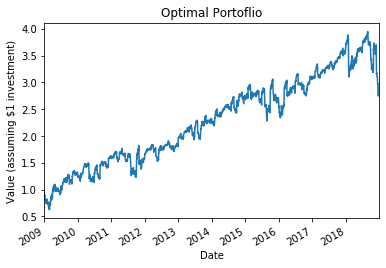

In [178]:
df_portfolio2.plot(x = 'caldt', y = 'portfolio value2',legend = None)
plt.ylabel("Value (assuming $1 investment)")
plt.xlabel("Date")
plt.title('Optimal Portoflio')